In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\issam\Desktop\wepApp\salary_data.csv")
data


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
data_array = data.to_numpy()
data_array

array([[1.10000e+00, 3.93430e+04],
       [1.30000e+00, 4.62050e+04],
       [1.50000e+00, 3.77310e+04],
       [2.00000e+00, 4.35250e+04],
       [2.20000e+00, 3.98910e+04],
       [2.90000e+00, 5.66420e+04],
       [3.00000e+00, 6.01500e+04],
       [3.20000e+00, 5.44450e+04],
       [3.20000e+00, 6.44450e+04],
       [3.70000e+00, 5.71890e+04],
       [3.90000e+00, 6.32180e+04],
       [4.00000e+00, 5.57940e+04],
       [4.00000e+00, 5.69570e+04],
       [4.10000e+00, 5.70810e+04],
       [4.50000e+00, 6.11110e+04],
       [4.90000e+00, 6.79380e+04],
       [5.10000e+00, 6.60290e+04],
       [5.30000e+00, 8.30880e+04],
       [5.90000e+00, 8.13630e+04],
       [6.00000e+00, 9.39400e+04],
       [6.80000e+00, 9.17380e+04],
       [7.10000e+00, 9.82730e+04],
       [7.90000e+00, 1.01302e+05],
       [8.20000e+00, 1.13812e+05],
       [8.70000e+00, 1.09431e+05],
       [9.00000e+00, 1.05582e+05],
       [9.50000e+00, 1.16969e+05],
       [9.60000e+00, 1.12635e+05],
       [1.03000e+01,

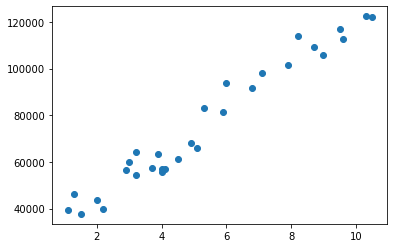

In [4]:
plt.scatter(data['YearsExperience'],data['Salary'])

In [5]:
#data = ((data - data.min()) / (data.max() - data.min()))

In [6]:
# 2 - Initialize our centroide
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [7]:
centroids = random_centroids(data, 2)

In [8]:
centroids

,0,1
YearsExperience,2.0,1.5
Salary,56642.0,105582.0


In [9]:
centroids_array = centroids.to_numpy().T

In [10]:
centroids_array

array([[2.00000e+00, 5.66420e+04],
       [1.50000e+00, 1.05582e+05]])

In [11]:
# 3 - label each data point
def get_labels(data, centroids):
    
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    #cluster le plus proche la minimale valeur
    return distances.idxmin(axis=1)

In [12]:
labels = get_labels(data, centroids)
labels
labels = labels.to_numpy()
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [13]:
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [14]:
data['cluster'] = labels

In [15]:
data

,YearsExperience,Salary,cluster
0,1.1,39343.0,0
1,1.3,46205.0,0
2,1.5,37731.0,0
3,2.0,43525.0,0
4,2.2,39891.0,0
5,2.9,56642.0,0
6,3.0,60150.0,0
7,3.2,54445.0,0
8,3.2,64445.0,0
9,3.7,57189.0,0


C:\Users\issam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


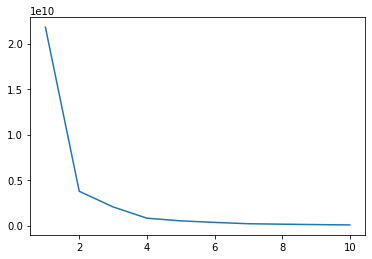

In [16]:
from sklearn.cluster import KMeans
import seaborn as sns
wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(data)
    wcss.append(clustering.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss);


In [17]:
from IPython.display import clear_output
def plot_clusters(data, centroids, iteration):
    data1 = data[data.cluster == 0]
    data2 = data[data.cluster == 1]
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(data1.YearsExperience,data1['Salary'],color='green',marker='*')
    plt.scatter(data2.YearsExperience,data2['Salary'],color='red',marker='*')
    plt.scatter(centroids[:,0],centroids[:,1],color='purple',marker='*')
    plt.xlabel('Years Experience')
    plt.ylabel('Salary')
    plt.show()
    

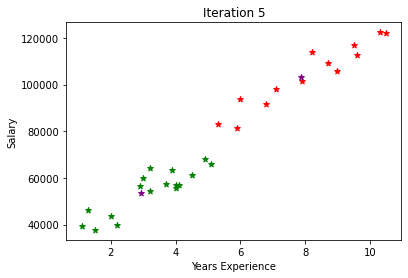

In [18]:
max_iterations = 100
k = 2


centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 100-
while iteration <max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, centroids.to_numpy().T, iteration)
    iteration += 1